## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, pathlib
from os import listdir
import cv2
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

### Data Preparation

In [3]:
'''##RENAME THE IMAGES IN ADENOCARCINOMA FOLDER
adenocarcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/adenocarcinoma"
n = 0 

for filename in os.listdir(adenocarcinoma_folder):
    
    #initialise new labels for individual images
    new_label= "adenocarcinoma" + str(n) + ".jpg"
    n+=1
    
    #label the images
    os.rename(os.path.join(adenocarcinoma_folder, filename), os.path.join(adenocarcinoma_folder,new_label))'''

'##RENAME THE IMAGES IN ADENOCARCINOMA FOLDER\nadenocarcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/adenocarcinoma"\nn = 0 \n\nfor filename in os.listdir(adenocarcinoma_folder):\n    \n    #initialise new labels for individual images\n    new_label= "adenocarcinoma" + str(n) + ".jpg"\n    n+=1\n    \n    #label the images\n    os.rename(os.path.join(adenocarcinoma_folder, filename), os.path.join(adenocarcinoma_folder,new_label))'

In [4]:
'''#RENAME THE IMAGES IN LARGE CELL CARCINOMA FOLDER
large_cell_carcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/large_cell_carcinoma"
n = 0 

for filename in os.listdir(large_cell_carcinoma_folder):
    
    #initialise new labels for individual images
    new_label= "Large_cell_carcinoma" + str(n) + ".jpg"
    n+=1
    
    #label the images
    os.rename(os.path.join(large_cell_carcinoma_folder, filename), os.path.join(large_cell_carcinoma_folder,new_label))'''

'#RENAME THE IMAGES IN LARGE CELL CARCINOMA FOLDER\nlarge_cell_carcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/large_cell_carcinoma"\nn = 0 \n\nfor filename in os.listdir(large_cell_carcinoma_folder):\n    \n    #initialise new labels for individual images\n    new_label= "Large_cell_carcinoma" + str(n) + ".jpg"\n    n+=1\n    \n    #label the images\n    os.rename(os.path.join(large_cell_carcinoma_folder, filename), os.path.join(large_cell_carcinoma_folder,new_label))'

In [5]:
'''#RENAME THE IMAGES IN NORMAL CELL FOLDER
normal_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal"
n = 0 

for filename in os.listdir(normal_folder):
    
    #initialise new labels for individual images
    new_label= "normal" + str(n) + ".jpg"
    n+=1
    
    #label the images
    os.rename(os.path.join(normal_folder, filename), os.path.join(normal_folder,new_label))'''

'#RENAME THE IMAGES IN NORMAL CELL FOLDER\nnormal_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal"\nn = 0 \n\nfor filename in os.listdir(normal_folder):\n    \n    #initialise new labels for individual images\n    new_label= "normal" + str(n) + ".jpg"\n    n+=1\n    \n    #label the images\n    os.rename(os.path.join(normal_folder, filename), os.path.join(normal_folder,new_label))'

In [6]:
'''#RENAME THE IMAGES IN squamous_cell_carcinoma_folder
squamous_cell_carcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/squamous_cell_carcinoma"
n = 0 

for filename in os.listdir(squamous_cell_carcinoma_folder):
    
    #initialise new labels for individual images
    new_label= "squamous_cell_carcinoma" + str(n) + ".jpg"
    n+=1
    
    #label the images
    os.rename(os.path.join(squamous_cell_carcinoma_folder, filename), os.path.join(squamous_cell_carcinoma_folder,new_label))'''

'#RENAME THE IMAGES IN squamous_cell_carcinoma_folder\nsquamous_cell_carcinoma_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/squamous_cell_carcinoma"\nn = 0 \n\nfor filename in os.listdir(squamous_cell_carcinoma_folder):\n    \n    #initialise new labels for individual images\n    new_label= "squamous_cell_carcinoma" + str(n) + ".jpg"\n    n+=1\n    \n    #label the images\n    os.rename(os.path.join(squamous_cell_carcinoma_folder, filename), os.path.join(squamous_cell_carcinoma_folder,new_label))'

In [7]:
#COPY THE CONTENTS OF THE INDIVIDUALY LABELLLED FOLDERS INTO A MAIN FOLDER THAT WILL CONTAIN ALL IMAGES

cancer_folders = ["C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/adenocarcinoma", "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/large_cell_carcinoma","C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal","C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/squamous_cell_carcinoma"]
file_folder = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/cell_images"
# Loop through the folders and copy their contents to the destination folder
for folder in cancer_folders:
    for file in os.listdir(folder):
        src = os.path.join(folder, file) # Path of the item in the source folder
        dest = os.path.join(file_folder, file) # Path of the item in the destination folder
        if os.path.isdir(src):# Check if the item is a directory
            shutil.copytree(src, dest, False, None) # Recursively copy the directory
        else:
            shutil.copy2(src,dest)# maintain file's metadata and attributes while copying

In [ ]:
from PIL import Image

# Define the target dimensions
target_width = 128
target_height = 128

# Define the input and output folders
input_folder = "cell_images"
output_folder = "cell"

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    # Open the image and resize it
    image_path = os.path.join(input_folder, filename)
    image = Image.open(image_path)
    resized_image = image.resize((target_width, target_height))
        
    # Save the resized image to the output folder
    output_path = os.path.join(output_folder, filename)
    resized_image.save(output_path)

In [54]:
2+2

4

### Load Dataset

In [36]:
img = cv2.imread(r"C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/cell_images/normal8.jpg")

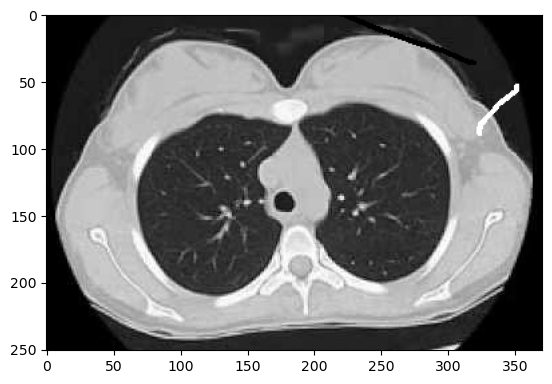

In [37]:
plt.imshow(img)

In [35]:
data_path = "C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal"
data_path

'C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal'

In [38]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
class_names = train_dataset.class_names
print(class_names)

In [25]:
data_path

'C:/Users/USWER/Desktop/Lung_Cancer_dataset/dataset/normal'

In [42]:
folder_path = 'cell_images'

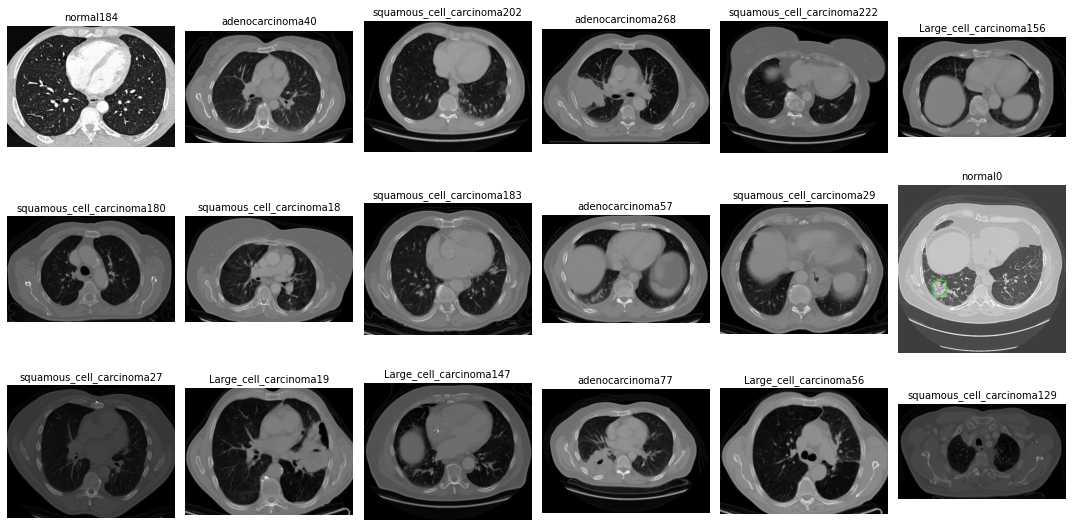

In [6]:
folder_path = 'cell_image'
image_names = os.listdir(folder_path)
random.shuffle(image_names)  # Shuffle the image names to get random ones

fig, axs = plt.subplots(3, 6, figsize=(15, 8))
axs = axs.ravel()  # Flatten the axs array

for i, image_name in enumerate(image_names[:18]):
    # Get the full path of the image
    image_path = os.path.join(folder_path, image_name)

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image on the subplot
    axs[i].imshow(img)

    # Set the title of the subplot to the image name (without extension)
    axs[i].set_title(os.path.splitext(image_name)[0], fontsize=10)
    
    # Set the label below the image with the image name (without extension)
    axs[i].set_xlabel(os.path.splitext(image_name)[0], fontsize=8)

    # Hide the axis labels
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [8]:
import os

# Define the folder path where the files are located

# List all the files in the folder
file_list = os.listdir(folder_path)

# Define the class names to check for prefixes
class_names = ["adenocarcinoma", "Large_cell_carcinoma", "squamous_cell_carcinoma", "normal"]

# Loop through each file in the folder
for filename in file_list:
    # Check if the filename starts with any of the class names
    for class_name in class_names:
        if filename.startswith(class_name):
            # Append an underscore "_" after the class name in the filename
            new_name = f"{class_name}_{filename[len(class_name):]}"
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_name))
            break

**Load the Data**

In [43]:
# Loop over all files in the folder
for filename in os.listdir("cell_images"):
    # Check if the file is not a JPG image
    if not filename.endswith('.jpg'):
        # Delete the file
        os.remove(os.path.join(folder_path, filename))

In [ ]:
import os
from PIL import Image

file_list = os.listdir("cell_images")

# Resize and convert RGBA images to RGB
for filename in file_list:
    image_path = os.path.join(folder_path, filename)
    with Image.open(image_path) as img:
        # Convert RGBA images to RGB
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        img_resized.save(image_path)

In [45]:
#for file in os.listdir("C:/Users/732093/3D Objects/dataset/Iris_resized"):
 #   img_path = os.path.join("C:/Users/732093/3D Objects/dataset/Iris_resized", file)

data = []
labels = []

for file in os.listdir("cell_images"):
    img_path = os.path.join("cell_images", file)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert the image to a NumPy array
    data.append(img_array)  # Add the NumPy array to the data list
    label = file.split("_")[0]  # Extract the class label from the name prefix
    labels.append(label)  # Add the label to the labels list

In [46]:
len(labels)

4988

In [47]:
data[1].shape

(224, 224, 3)

In [48]:
data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [49]:
labels

['adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarci

**~ encode categorical labels into numerical labels**

In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
label_encoder = LabelEncoder()

In [171]:
label_encoder.fit(labels)

LabelEncoder()

In [172]:
integer_labels = label_encoder.transform(labels)

In [173]:
integer_labels = np.array(integer_labels)

In [174]:
Labels=(list(set(labels)))

In [56]:
Labels

['adenocarcinoma', 'large', 'squamous', 'normal']

In [175]:
Labels

['adenocarcinoma', 'large', 'squamous', 'normal']

In [176]:
# # Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(integer_labels)

In [58]:
len(integer_labels)

4988

In [59]:
len(data)

4988

In [60]:
labels

array([0, 0, 0, ..., 3, 3, 3])

**Model Utilizing VGG16 CNN ARCHITECTURE**

###### **<font color="red">Model Utilizing VGG16 CNN ARCHITECTURE</font>**

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from keras.applications import VGG16

In [269]:
# Split the data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(data, integer_labels, test_size=0.3, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [90]:
len(test_labels)

1497

In [91]:
print("Number of training samples:", len(train_images))
print("Number of training labels:", len(train_labels))
print("Number of validation samples:", len(val_images))
print("Number of validation labels:", len(val_labels))

Number of training samples: 2792
Number of training labels: 2792
Number of validation samples: 699
Number of validation labels: 699


In [378]:
# Define the CNN model
VGG16model = Sequential()

In [379]:
# Add convolutional layers
VGG16model.add(layers.Conv2D(32, (3, 3), activation='relu'))#, input_shape=(image_height, image_width, image_channels)))
VGG16model.add(layers.MaxPooling2D((2, 2)))
VGG16model.add(layers.Conv2D(64, (3, 3), activation='relu'))
VGG16model.add(layers.MaxPooling2D((2, 2)))
VGG16model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
VGG16model.add(layers.Flatten())
VGG16model.add(layers.Dropout(0.5))
VGG16model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dense(64, activation='relu'))
VGG16model.add(layers.Dense(4, activation='softmax'))

In [380]:
# Compile the model
VGG16model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [381]:
history = VGG16model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
83/83 [==============================] - 2s 22ms/step - loss: 18.9600 - accuracy: 0.5815 - val_loss: 0.9777 - val_accuracy: 0.6858
Epoch 2/15
83/83 [==============================] - 2s 21ms/step - loss: 0.9787 - accuracy: 0.6851 - val_loss: 0.9534 - val_accuracy: 0.7128
Epoch 3/15
83/83 [==============================] - 2s 21ms/step - loss: 0.9022 - accuracy: 0.7149 - val_loss: 0.8853 - val_accuracy: 0.7264
Epoch 4/15
83/83 [==============================] - 2s 21ms/step - loss: 0.8745 - accuracy: 0.7235 - val_loss: 0.8679 - val_accuracy: 0.7466
Epoch 5/15
83/83 [==============================] - 2s 21ms/step - loss: 0.8463 - accuracy: 0.7412 - val_loss: 0.8968 - val_accuracy: 0.7297
Epoch 6/15
83/83 [==============================] - 2s 21ms/step - loss: 0.8260 - accuracy: 0.7461 - val_loss: 0.8428 - val_accuracy: 0.7331
Epoch 7/15
83/83 [==============================] - 2s 21ms/step - loss: 0.7778 - accuracy: 0.7770 - val_loss: 0.8105 - val_accuracy: 0.7399
Epoch 8/15
8

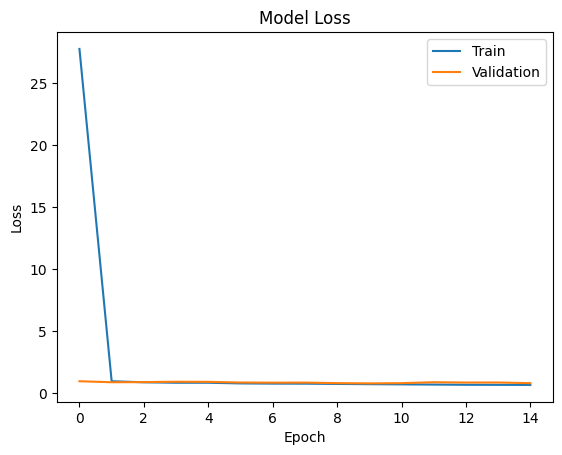

In [274]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

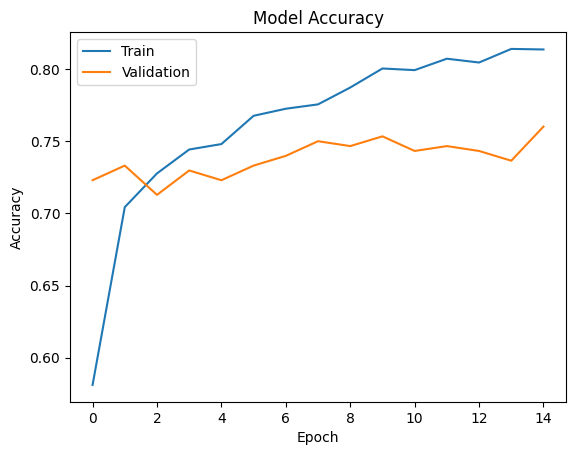

In [275]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [276]:
y_pred = CNNmodel.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

40/40 [==============================] - 0s 9ms/step


Text(0.5, 1.0, 'Confusion Matrix')

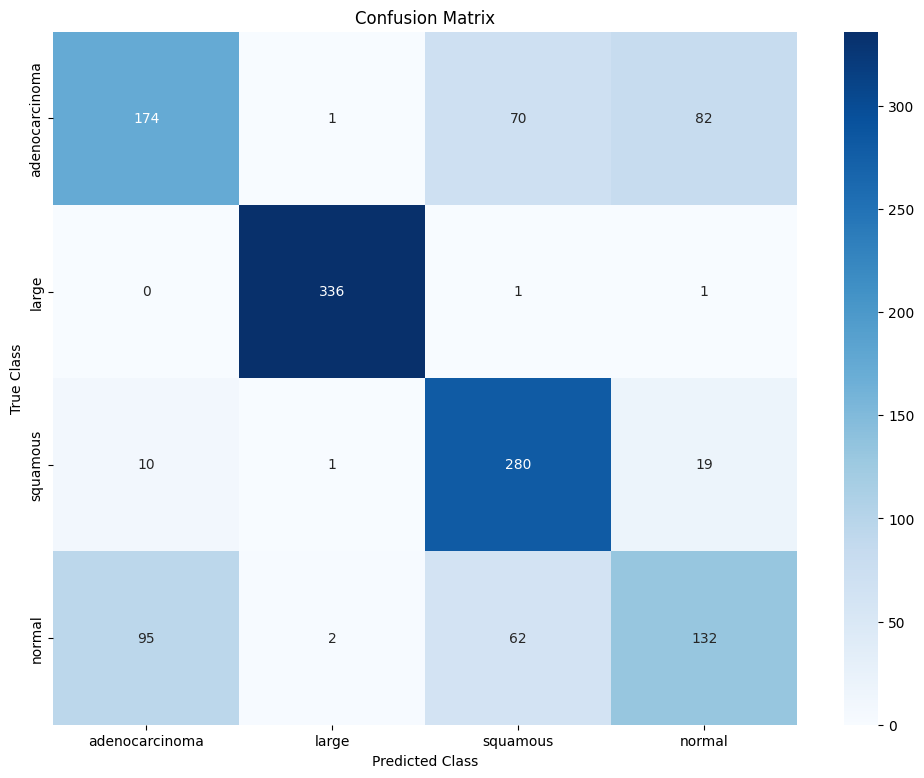

In [277]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [278]:
predictions = model.predict(test_images)

40/40 [==============================] - 1s 23ms/step


In [279]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(test_labels, y_pred_classes, target_names=Labels)

In [280]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_classes)

In [282]:
# Display results
print("Classification Report:\n", report)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
                 precision    recall  f1-score   support

adenocarcinoma       0.62      0.53      0.57       327
         large       0.99      0.99      0.99       338
      squamous       0.68      0.90      0.77       310
        normal       0.56      0.45      0.50       291

      accuracy                           0.73      1266
     macro avg       0.71      0.72      0.71      1266
  weighted avg       0.72      0.73      0.72      1266

Accuracy: 0.7283


In [414]:
predictions = VGG16model.predict(test_images)

40/40 [==============================] - 1s 16ms/step


In [415]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4 

In [416]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

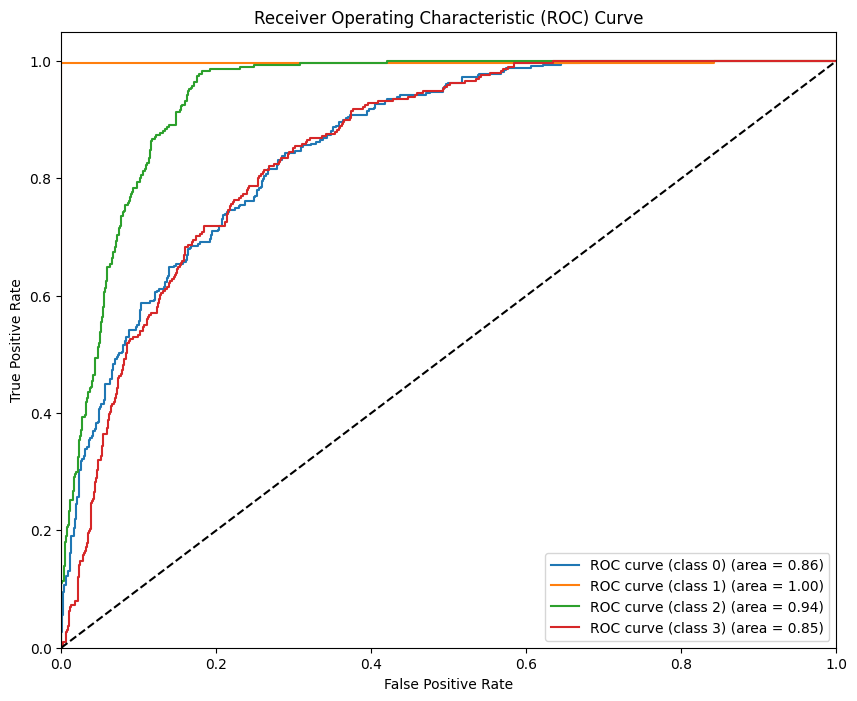

In [417]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Model Utilizing SqueezeNet CNN ARCHITECTURE**

In [192]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from sklearn.metrics import precision_score
import random
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

**<font color="red">Model Utilizing SqueezeNet CNN ARCHITECTURE</font>**

In [193]:
# Split the data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [419]:
SqueezeNet = Sequential()

In [420]:
# Add the first Convolutional layer
SqueezeNet.add(Conv2D(96, (7, 7), strides=(2, 2), padding='same'))
SqueezeNet.add(Activation('relu'))

In [421]:
# Add the MaxPooling layer
SqueezeNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [422]:
# Add the Fire modules
fire_id = 2
filters = [16, 64, 128, 256]
for i in range(4):
    SqueezeNet.add(Conv2D(filters[i], (1, 1), padding='same', name='fire{}/squeeze'.format(fire_id)))
    SqueezeNet.add(Activation('relu'))
    SqueezeNet.add(Conv2D(filters[i], (3, 3), padding='same', name='fire{}/expand1'.format(fire_id)))
    SqueezeNet.add(Activation('relu'))
    SqueezeNet.add(Conv2D(filters[i], (3, 3), padding='same', name='fire{}/expand2'.format(fire_id)))
    SqueezeNet.add(Activation('relu'))
    fire_id += 1

In [423]:
# Add the second Convolutional layer
SqueezeNet.add(Conv2D(64, (1, 1), padding='same'))
SqueezeNet.add(Activation('relu'))

In [424]:
# Add the Dropout layer
SqueezeNet.add(Dropout(0.5))

In [425]:
# Add the third Convolutional layer
SqueezeNet.add(Conv2D(4, (1, 1), padding='same'))
SqueezeNet.add(Activation('relu'))

In [426]:
# Add the Flatten layer
SqueezeNet.add(Flatten())

In [427]:
# Add the Dense layer
SqueezeNet.add(Dense(4, activation='softmax'))

In [428]:
# Compile the model
SqueezeNet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [429]:
# Train the model
history2=SqueezeNet.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
83/83 [==============================] - 4s 48ms/step - loss: 1.2641 - accuracy: 0.3921 - val_loss: 1.0135 - val_accuracy: 0.5541
Epoch 2/15
83/83 [==============================] - 4s 45ms/step - loss: 0.8607 - accuracy: 0.6282 - val_loss: 0.6982 - val_accuracy: 0.6892
Epoch 3/15
83/83 [==============================] - 4s 45ms/step - loss: 0.6623 - accuracy: 0.7273 - val_loss: 0.5457 - val_accuracy: 0.7534
Epoch 4/15
83/83 [==============================] - 4s 45ms/step - loss: 0.4834 - accuracy: 0.8056 - val_loss: 0.5220 - val_accuracy: 0.7770
Epoch 5/15
83/83 [==============================] - 4s 45ms/step - loss: 0.3810 - accuracy: 0.8414 - val_loss: 0.5469 - val_accuracy: 0.8007
Epoch 6/15
83/83 [==============================] - 4s 45ms/step - loss: 0.3215 - accuracy: 0.8667 - val_loss: 0.4424 - val_accuracy: 0.8311
Epoch 7/15
83/83 [==============================] - 4s 45ms/step - loss: 0.3092 - accuracy: 0.8783 - val_loss: 0.4158 - val_accuracy: 0.8243
Epoch 8/15
83

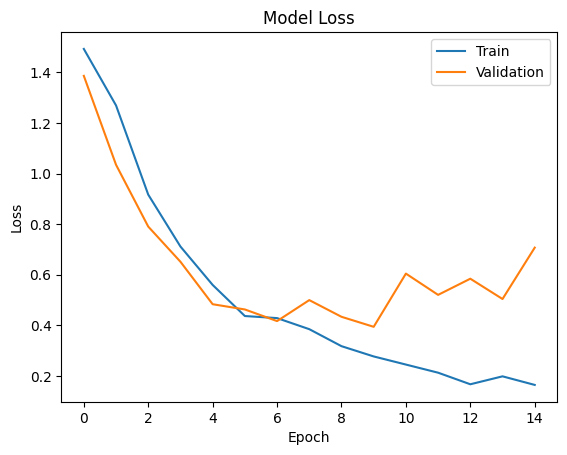

In [294]:
# plot training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

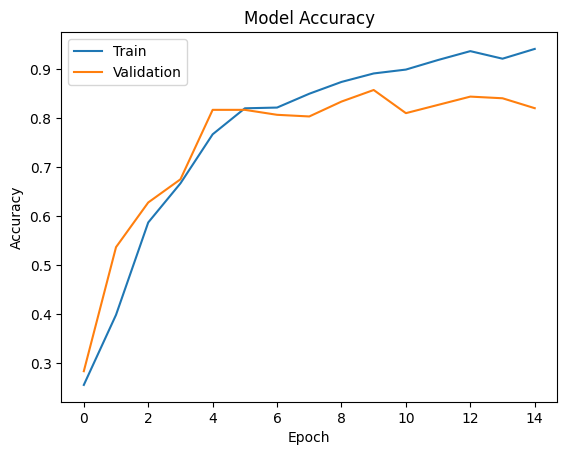

In [295]:
# plot training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

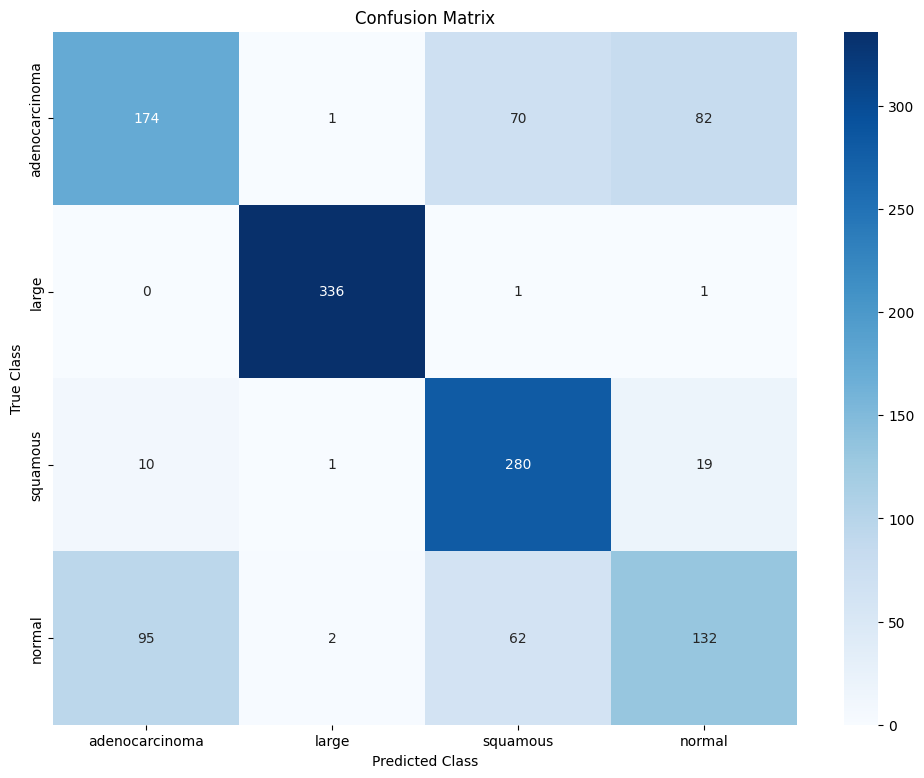

In [296]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

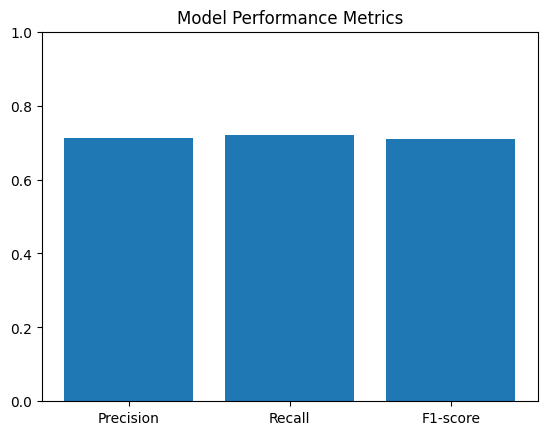

In [297]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_labels, average='macro')

# Plot the metrics as a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_title('Model Performance Metrics')
plt.show()

In [430]:
y_pred = SqueezeNet.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

40/40 [==============================] - 1s 23ms/step


In [431]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(test_labels, y_pred_classes, target_names=Labels)

In [432]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_classes)

In [433]:
# Display results
print("Classification Report:\n", report)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
                 precision    recall  f1-score   support

adenocarcinoma       0.87      0.79      0.83       327
         large       0.96      0.98      0.97       338
      squamous       0.71      0.81      0.76       310
        normal       0.69      0.65      0.67       291

      accuracy                           0.81      1266
     macro avg       0.81      0.81      0.80      1266
  weighted avg       0.81      0.81      0.81      1266

Accuracy: 0.8112


In [435]:
predictions = SqueezeNet.predict(test_images)

40/40 [==============================] - 1s 17ms/step


In [436]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4 

In [437]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

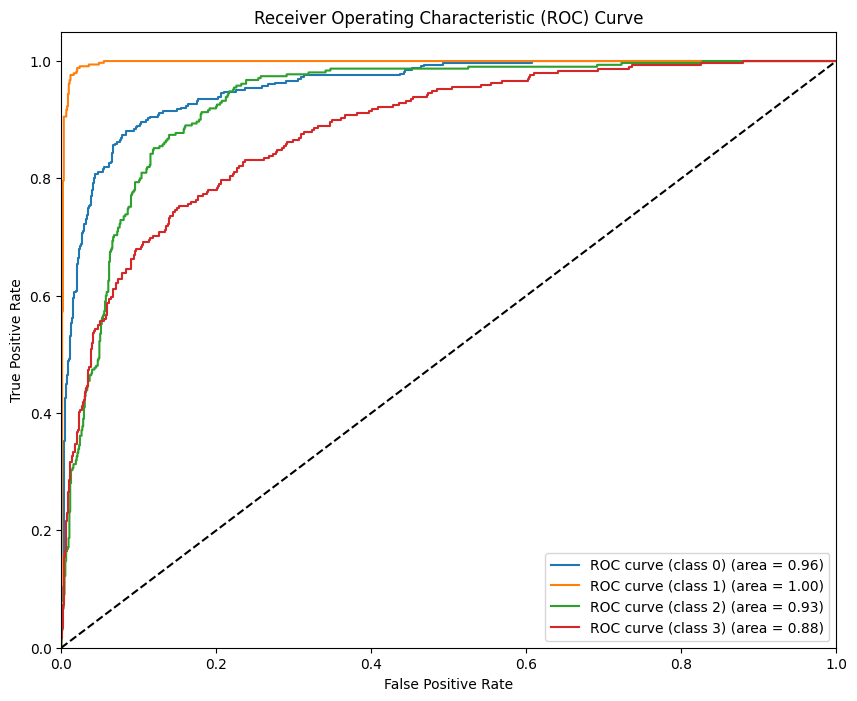

In [438]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Utilizing MobileNetV3 architecture 

In [213]:
# Split the data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [302]:
data[2].shape

(224, 224, 3)

In [439]:
# Define the model architecture
MNetv4 = tf.keras.Sequential([
    # First layer
    tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    
    # Depthwise separable convolution layers
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(48, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(96, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(160, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(160, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(320, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    # Final layers
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1280, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [440]:
MNetv4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [441]:
history = MNetv4.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
83/83 [==============================] - 6s 66ms/step - loss: 0.8692 - accuracy: 0.6399 - val_loss: 2.7175 - val_accuracy: 0.2264
Epoch 2/15
83/83 [==============================] - 5s 63ms/step - loss: 0.6068 - accuracy: 0.7623 - val_loss: 4.2763 - val_accuracy: 0.2264
Epoch 3/15
83/83 [==============================] - 5s 63ms/step - loss: 0.4693 - accuracy: 0.8128 - val_loss: 3.9271 - val_accuracy: 0.2466
Epoch 4/15
83/83 [==============================] - 5s 63ms/step - loss: 0.4292 - accuracy: 0.8230 - val_loss: 5.1303 - val_accuracy: 0.2466
Epoch 5/15
83/83 [==============================] - 5s 63ms/step - loss: 0.4158 - accuracy: 0.8328 - val_loss: 4.4350 - val_accuracy: 0.2466
Epoch 6/15
83/83 [==============================] - 5s 64ms/step - loss: 0.3859 - accuracy: 0.8373 - val_loss: 4.7754 - val_accuracy: 0.2973
Epoch 7/15
83/83 [==============================] - 5s 66ms/step - loss: 0.3654 - accuracy: 0.8493 - val_loss: 1.7269 - val_accuracy: 0.5000
Epoch 8/15
83

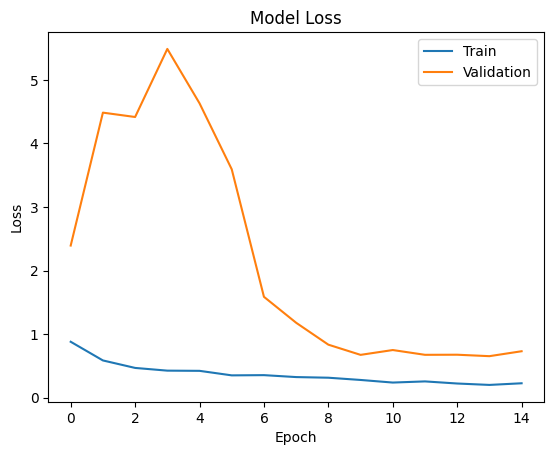

In [306]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

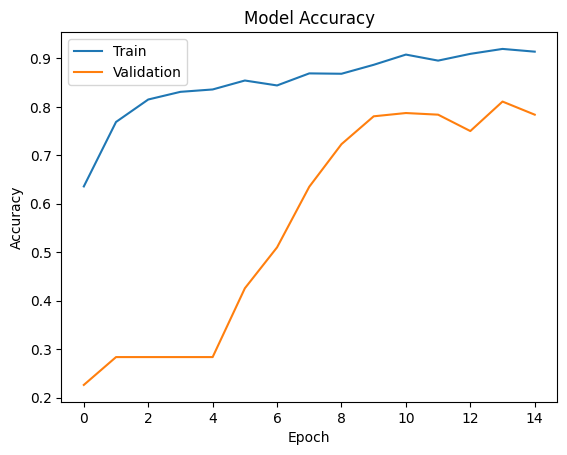

In [307]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [442]:
y_pred = MNetv4.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

40/40 [==============================] - 0s 8ms/step


In [443]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(test_labels, y_pred_classes, target_names=Labels)

In [444]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_classes)

In [311]:
# Display results
print("Classification Report:\n", report)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
                 precision    recall  f1-score   support

adenocarcinoma       0.76      0.87      0.81       327
         large       0.97      0.92      0.95       338
      squamous       0.75      0.87      0.81       310
        normal       0.77      0.55      0.64       291

      accuracy                           0.81      1266
     macro avg       0.81      0.80      0.80      1266
  weighted avg       0.81      0.81      0.81      1266

Accuracy: 0.8104


Text(0.5, 1.0, 'Confusion Matrix')

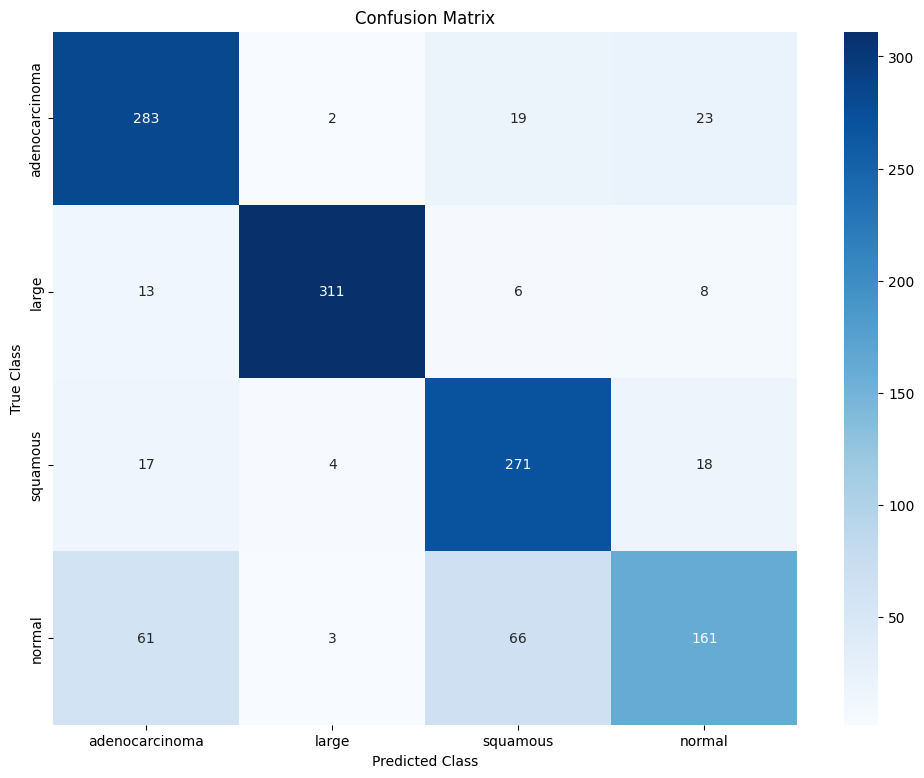

In [312]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

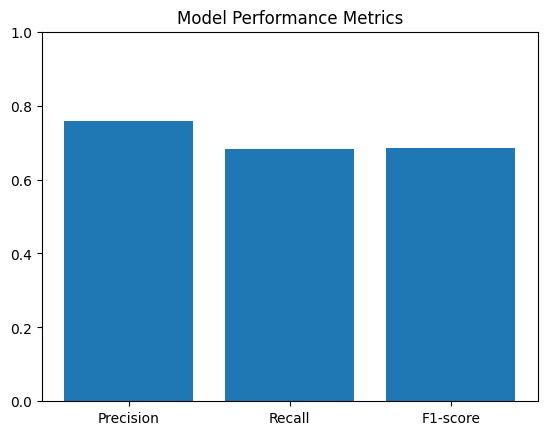

In [225]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true=test_labels
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_labels, average='macro')

# Plot the metrics as a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_title('Model Performance Metrics')
plt.show()

In [313]:
MNetv4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_250 (Conv2D)         (None, 112, 112, 16)      448       
                                                                 
 batch_normalization_218 (Ba  (None, 112, 112, 16)     64        
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_12 (Depthw  (None, 112, 112, 16)     160       
 iseConv2D)                                                      
                                                                 
 batch_normalization_219 (Ba  (None, 112, 112, 16)     64        
 tchNormalization)                                               
                                                                 
 conv2d_251 (Conv2D)         (None, 112, 112, 32)      544       
                                                     

In [445]:
predictions = MNetv4.predict(test_images)

40/40 [==============================] - 0s 8ms/step


In [446]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4 

In [447]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

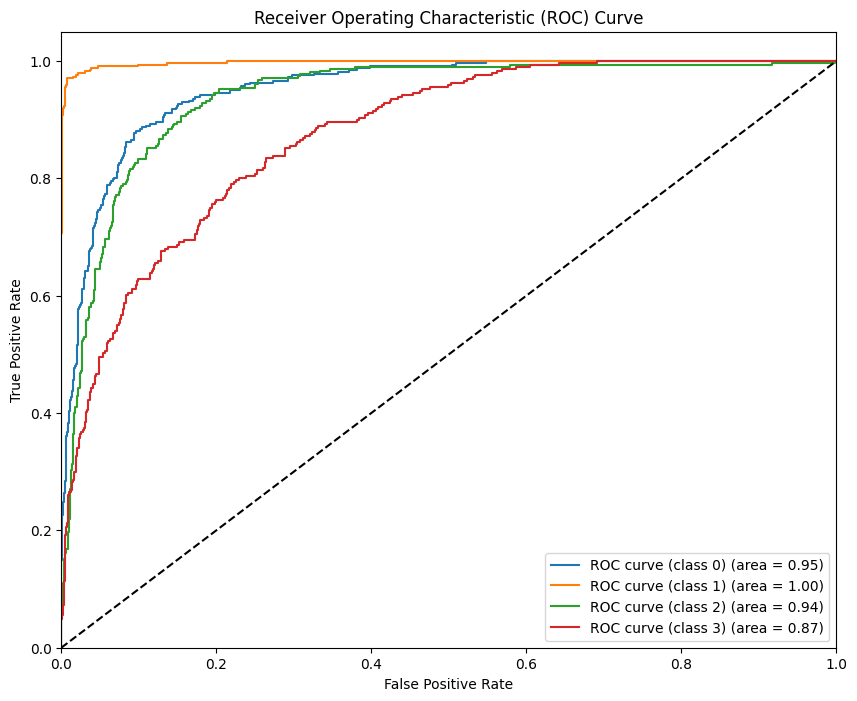

In [448]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Utilizing InceptionV3 architecture

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(data, integer_labels, test_size=0.3, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.6, random_state=42)

In [450]:
CNNmodel = Sequential()

In [451]:
# Add convolutional layers
CNNmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNNmodel.add(MaxPooling2D((2, 2)))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(MaxPooling2D((2, 2)))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))

In [452]:
# Add fully connected layers
CNNmodel.add(Flatten())
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
CNNmodel.add(Dense(4, activation='softmax'))

In [453]:
# Compile the model
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNNmodel.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_494 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_495 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_496 (Conv2D)         (None, 52, 52, 64)        36928     
                                                                 
 flatten_17 (Flatten)        (None, 173056)          

In [454]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import regularizers

In [455]:
# Create a Sequential model
CNNmodel = Sequential()

In [456]:
# Add convolutional layers
CNNmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNNmodel.add(MaxPooling2D((2, 2)))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(MaxPooling2D((2, 2)))

In [457]:
# Inception-block 1
CNNmodel.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
CNNmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
CNNmodel.add(Conv2D(256, (5, 5), activation='relu', padding='same'))

In [458]:
# Inception-block 2
CNNmodel.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
CNNmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
CNNmodel.add(Conv2D(256, (5, 5), activation='relu', padding='same'))

In [459]:
CNNmodel.add(Flatten())
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
CNNmodel.add(Dense(4, activation='softmax'))

In [460]:
# Compile the model
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNNmodel.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_497 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_498 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_499 (Conv2D)         (None, 54, 54, 64)        4160      
                                                                 
 conv2d_500 (Conv2D)         (None, 54, 54, 128)     

In [461]:
# Train the model
history = CNNmodel.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
83/83 [==============================] - 4s 47ms/step - loss: 12.8826 - accuracy: 0.4742 - val_loss: 1.8343 - val_accuracy: 0.5676
Epoch 2/15
83/83 [==============================] - 4s 44ms/step - loss: 1.6418 - accuracy: 0.6041 - val_loss: 1.4936 - val_accuracy: 0.6723
Epoch 3/15
83/83 [==============================] - 4s 43ms/step - loss: 1.3647 - accuracy: 0.6866 - val_loss: 1.3471 - val_accuracy: 0.7162
Epoch 4/15
83/83 [==============================] - 4s 43ms/step - loss: 1.2538 - accuracy: 0.6968 - val_loss: 1.1921 - val_accuracy: 0.6858
Epoch 5/15
83/83 [==============================] - 4s 43ms/step - loss: 1.1568 - accuracy: 0.7115 - val_loss: 1.1162 - val_accuracy: 0.7095
Epoch 6/15
83/83 [==============================] - 4s 43ms/step - loss: 1.0619 - accuracy: 0.7315 - val_loss: 1.0466 - val_accuracy: 0.7196
Epoch 7/15
83/83 [==============================] - 4s 43ms/step - loss: 1.0045 - accuracy: 0.7409 - val_loss: 1.0445 - val_accuracy: 0.7264
Epoch 8/15
8

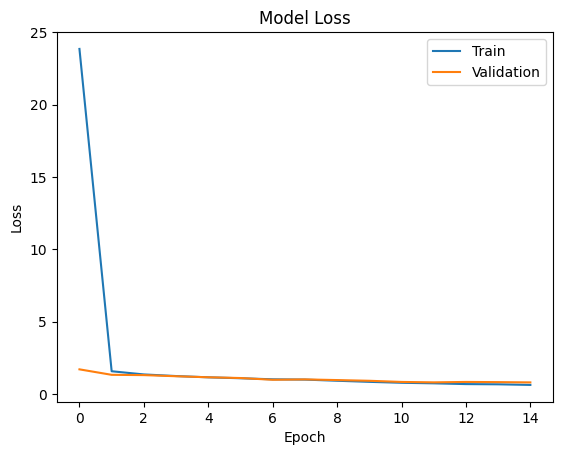

In [333]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

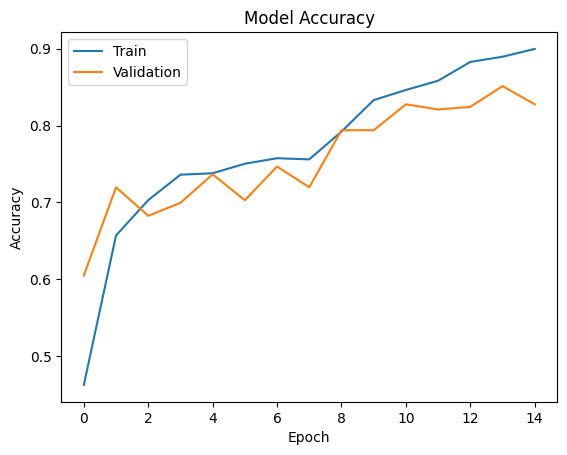

In [334]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [462]:
y_pred = MNetv4.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

40/40 [==============================] - 1s 12ms/step


In [336]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(test_labels, y_pred_classes, target_names=Labels)

In [337]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_classes)

In [338]:
# Display results
print("Classification Report:\n", report)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
                 precision    recall  f1-score   support

adenocarcinoma       0.76      0.87      0.81       327
         large       0.97      0.92      0.95       338
      squamous       0.75      0.87      0.81       310
        normal       0.77      0.55      0.64       291

      accuracy                           0.81      1266
     macro avg       0.81      0.80      0.80      1266
  weighted avg       0.81      0.81      0.81      1266

Accuracy: 0.8104


Text(0.5, 1.0, 'Confusion Matrix')

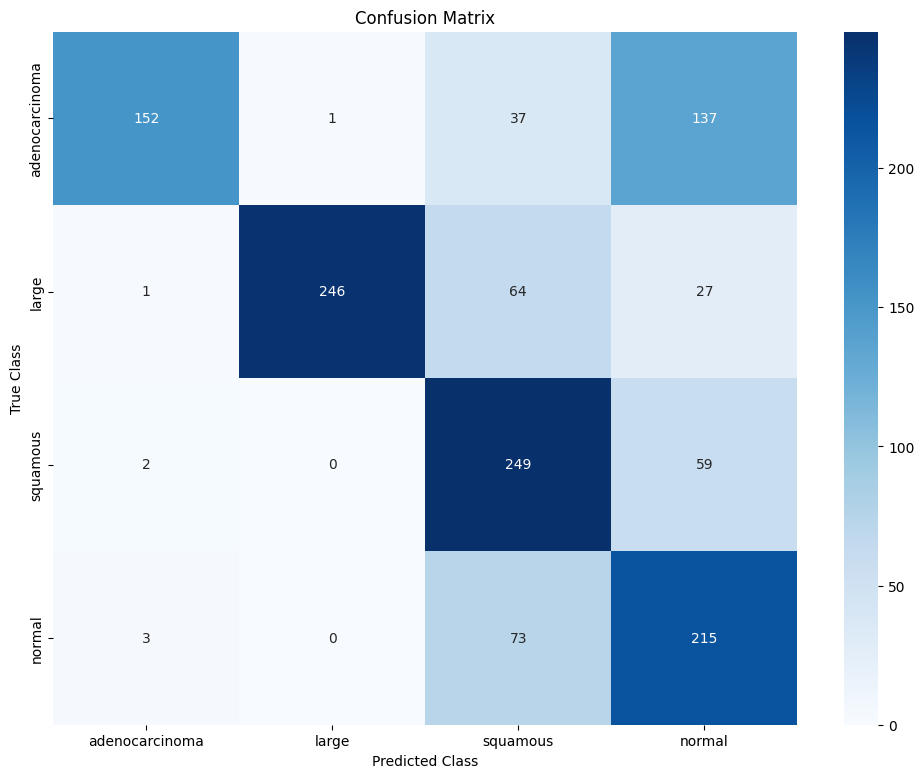

In [258]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

In [464]:
predictions = CNNmodel.predict(test_images)

40/40 [==============================] - 1s 15ms/step


In [465]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4 

In [466]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

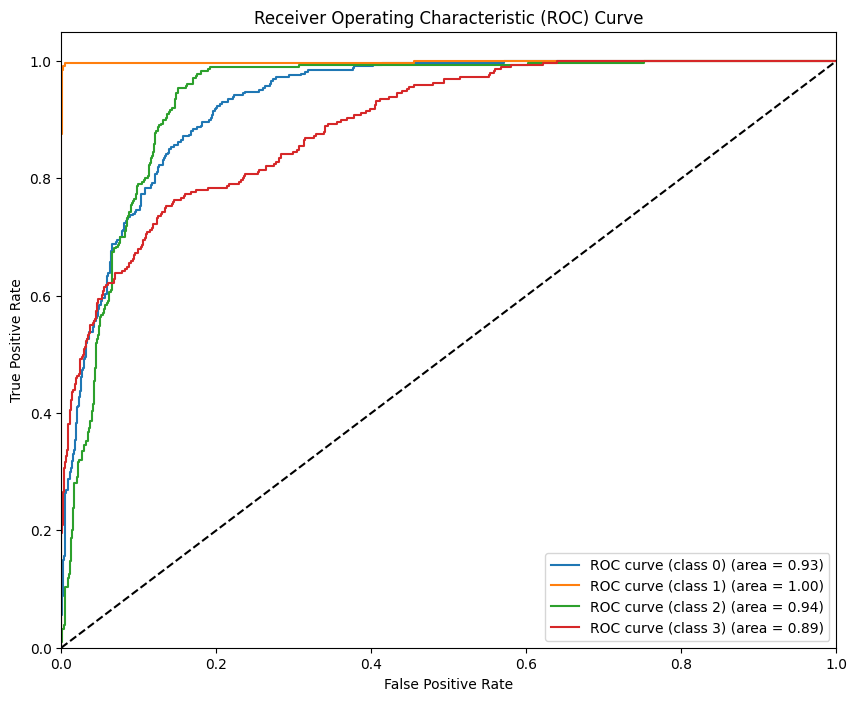

In [467]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()